# 1. Импорт и подготовка данных

In [1]:
import pandas as pd

In [4]:
temp_df = pd.read_csv("C:\\Users\\Лев\\Projects\\Diploma\\sbp2.csv", sep=';')

In [6]:
temp_df['T'] = temp_df['T'].ffill()

In [7]:
temp_df['time'] = pd.to_datetime(temp_df['time'], dayfirst=True)

In [8]:
temp_df = temp_df.sort_values(by=['time'])

In [9]:
date_temp_df = temp_df.copy(deep=True)
date_temp_df['time'] = date_temp_df['time'].dt.date

In [ ]:
date_temp_df.tail(30)

In [11]:
date_temp_df = date_temp_df.groupby('time')['T'].mean()
date_temp_df

time
2005-03-01   -12.8875
2005-03-02   -12.9125
2005-03-03    -9.5500
2005-03-04    -6.2125
2005-03-05    -4.8625
               ...   
2024-02-13   -12.1625
2024-02-14   -10.1500
2024-02-15    -6.3000
2024-02-16    -2.2625
2024-02-17     1.3625
Name: T, Length: 6926, dtype: float64

In [12]:
import numpy as np
from scipy import stats
import seaborn as sns
from sktime.utils.plotting import plot_series

In [13]:
date_temp_df = pd.DataFrame(date_temp_df)
date_temp_df.index = pd.date_range(start=date_temp_df.index[0], periods=len(date_temp_df.index), freq='D')

(<Figure size 1600x400 with 1 Axes>, <Axes: >)

<Figure size 1500x500 with 0 Axes>

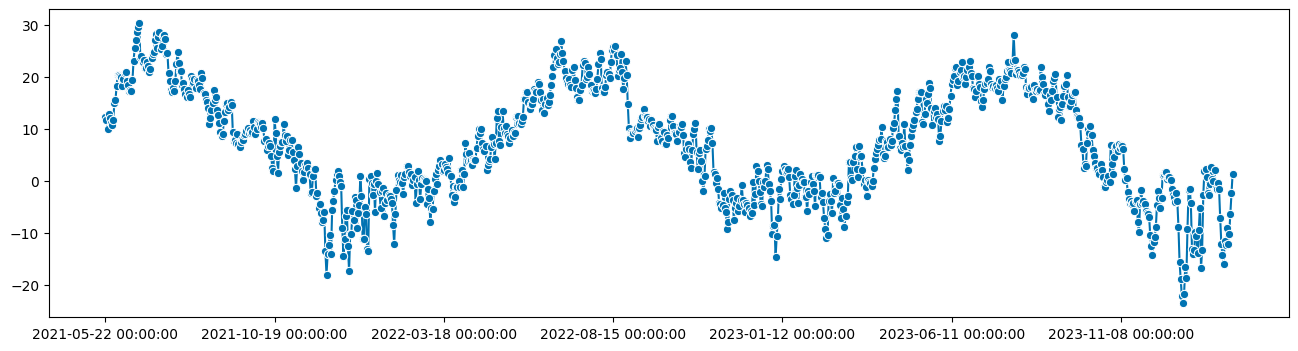

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plot_series(date_temp_df[-1000:])

In [15]:
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

6561 365


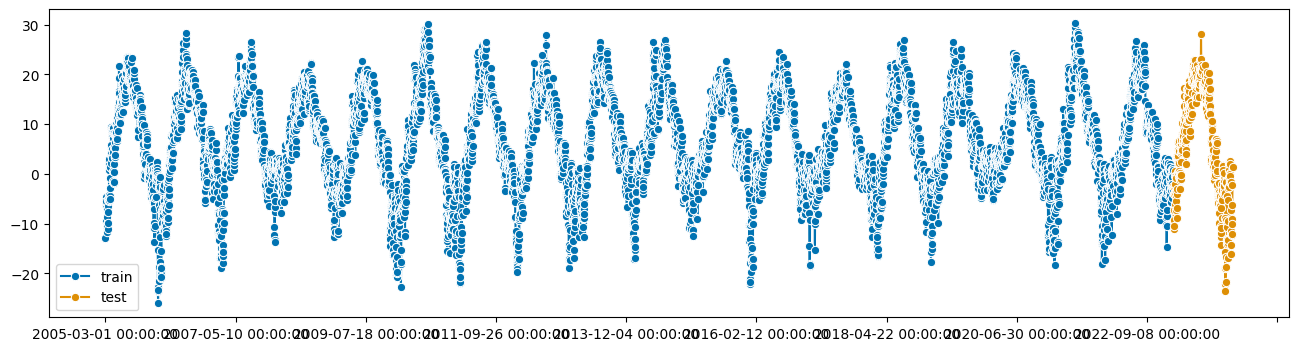

In [16]:
from sktime.forecasting.model_selection import temporal_train_test_split

dtd_train, dtd_test = temporal_train_test_split(date_temp_df, test_size=365)
plot_series(dtd_train, dtd_test, labels=['train', 'test'])
print(dtd_train.shape[0], dtd_test.shape[0])

In [17]:
from sktime.forecasting.base import ForecastingHorizon

fh = ForecastingHorizon(dtd_test.index, is_relative=False)
fh

ForecastingHorizon(['2023-02-16', '2023-02-17', '2023-02-18', '2023-02-19',
               '2023-02-20', '2023-02-21', '2023-02-22', '2023-02-23',
               '2023-02-24', '2023-02-25',
               ...
               '2024-02-06', '2024-02-07', '2024-02-08', '2024-02-09',
               '2024-02-10', '2024-02-11', '2024-02-12', '2024-02-13',
               '2024-02-14', '2024-02-15'],
              dtype='datetime64[ns]', length=365, freq='D', is_relative=False)

# Наивный прогноз

(<Figure size 1600x400 with 1 Axes>, <Axes: >)

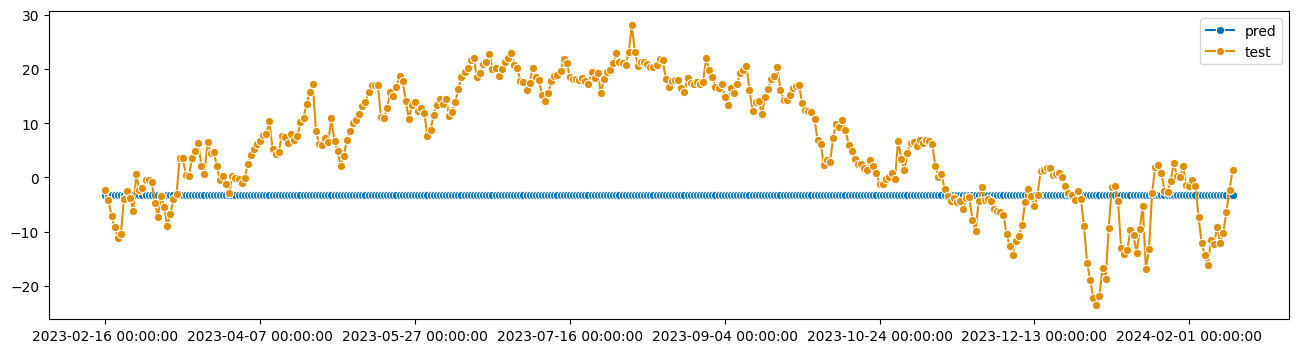

In [18]:
from sktime.forecasting.naive import NaiveForecaster

forecaster = NaiveForecaster(strategy="last")
forecaster.fit(dtd_train)

dtd_pred = forecaster.predict(fh)
plot_series(dtd_pred, dtd_test, labels=['pred', 'test'])

In [19]:
rmse(dtd_pred, dtd_test)  # 14.470289

14.470289413221984

С сезонной составляющей:

(<Figure size 1600x400 with 1 Axes>, <Axes: >)

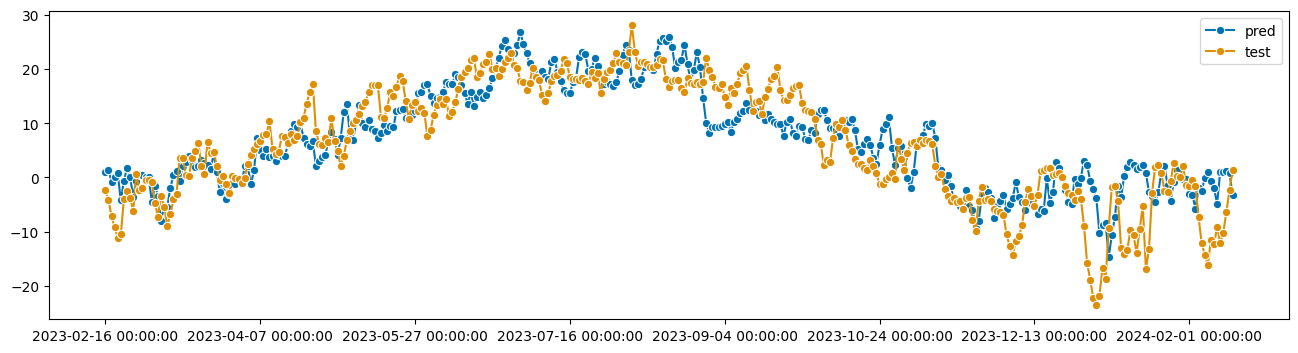

In [20]:
forecaster = NaiveForecaster(strategy="last", sp=365)
forecaster.fit(dtd_train)

dtd_pred = forecaster.predict(fh)
plot_series(dtd_pred, dtd_test, labels=['pred', 'test'])

In [ ]:
rmse(dtd_pred, dtd_test)  # 5.732899

# EST (AAA) модель

c:\Users\Лев\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


(<Figure size 1600x400 with 1 Axes>, <Axes: >)

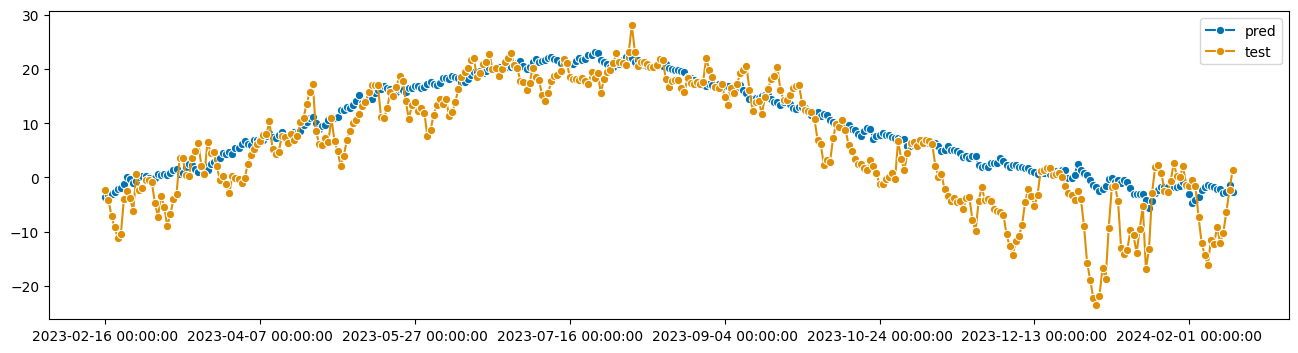

In [23]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing

forecaster = ExponentialSmoothing(trend='add', seasonal='add', sp=365)
forecaster.fit(dtd_train)

dtd_pred = forecaster.predict(fh)
plot_series(dtd_pred, dtd_test, labels=['pred', 'test'])

In [24]:
rmse(dtd_pred, dtd_test)  # 5.62798

5.627979762495399

In [26]:
np.mean(np.abs(dtd_pred - dtd_test))

4.093706150976077